# LAB03 Assigment
### Exercise1 Spam filtering
### 1) Preparing the text data
    remove the stop words, puntuations and special characters from the dictionary
### 2) Creating word dictionary

In [2]:
from IPython.display import display  # Allows the use of display() for DataFrames
import seaborn as sns
from sklearn import metrics
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") 
import os
from nltk.corpus import stopwords 
from collections import Counter
def make_Dictionary(train_dir):
    emails = [os.path.join(train_dir,f) for f in os.listdir (train_dir)]
    all_words = []
    for mail in emails:
        with open (mail) as m:
            for i,line in enumerate (m) :
                if i == 2:
                    words = line.split()
                    all_words += words
    dictionary = Counter(all_words)
    # Write code for non-word removal here
    stop_words = set(stopwords.words("english"))
    dict_keys = list(dictionary.keys())
    for word in dict_keys:
        if (word in stop_words) or (word.isalpha() == False) or (word.isalpha() == True and len(word) == 1):
            del dictionary[word]

    return dictionary.most_common(3000)
    
#most frequent words in train-mails samples
dict = make_Dictionary("./ling-spam/train-mails")
dict

[('order', 1414),
 ('address', 1293),
 ('report', 1216),
 ('mail', 1127),
 ('send', 1079),
 ('language', 1072),
 ('email', 1051),
 ('program', 1001),
 ('list', 935),
 ('one', 917),
 ('name', 878),
 ('receive', 826),
 ('money', 788),
 ('free', 762),
 ('work', 755),
 ('information', 677),
 ('business', 654),
 ('please', 652),
 ('university', 595),
 ('us', 564),
 ('day', 556),
 ('follow', 544),
 ('internet', 520),
 ('http', 479),
 ('check', 472),
 ('call', 469),
 ('include', 452),
 ('com', 448),
 ('linguistic', 442),
 ('number', 423),
 ('want', 420),
 ('letter', 419),
 ('need', 418),
 ('many', 412),
 ('market', 395),
 ('start', 390),
 ('even', 386),
 ('fax', 383),
 ('form', 380),
 ('first', 373),
 ('web', 366),
 ('service', 363),
 ('interest', 362),
 ('software', 352),
 ('remove', 349),
 ('read', 347),
 ('week', 344),
 ('every', 332),
 ('credit', 329),
 ('site', 320),
 ('much', 318),
 ('english', 318),
 ('edu', 318),
 ('product', 317),
 ('bulk', 312),
 ('phone', 311),
 ('must', 299),
 ('t

### 3) Feature Extraction Process
    The word dictionary is composed of 3000 most common words in the trainning set. the extract_features function produces coressponding feture vector(word count in single mail)

In [3]:
import os
import numpy as np
def extract_features(mail_dir):
    files = [os.path.join(mail_dir,fi) for fi in os.listdir(mail_dir)]
    features_matrix = np.zeros((len(files),3000))
    docID = 0
    _i = 0
    print(len(files))
    for fil in files:
        _i+=1
        with open(fil) as fi:
            for i,line in enumerate(fi):
                if i == 2:
                    words = line.split()
                    for word in words:
                        wordID = 0
                        for i,d in enumerate(dict):
                            if d[0] == word:
                                wordID = i
                                features_matrix[docID,wordID]+=1
            docID = docID + 1
        print('\r','done {} files'.format(_i),flush=True,end='')
    return features_matrix

In [4]:
#correspondin feture matrix of the training mail samples
features_matrix = extract_features("./ling-spam/train-mails")
features_matrix

702
 done 702 files

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

### 4) Training the Classifiers
    First build another fucntion to extract the lables of samples(extract_lable).
    Then, extract the coresponding labels and features of both training samples and test samples.

In [5]:
from pandas.core.frame import DataFrame
import numpy as np
def extract_label(mail_dir):
    lables = []
    mails = [fi for fi in os.listdir(mail_dir)]
    
    for mail in mails :
        
        if "spmsg" in mail:
            lables.append(0)
        else:
            lables.append(1)
    
    return lables
# Prepare feature vectors per training mail and its labels
array_x_train = np.array(extract_features("./ling-spam/train-mails"))

X_train = DataFrame(array_x_train)
print(X_train)
y_train = DataFrame(extract_label("./ling-spam/train-mails"))
print(y_train)
array_x_test = np.array(extract_features("./ling-spam/test-mails"))

# Prepare feature vectors per test mail and its labels
X_test = DataFrame(array_x_test)
y_test = DataFrame(extract_label("./ling-spam/test-mails"))


702
 done 702 files     0     1     2     3     4     5     6     7     8     9     ...  2990  \
0     0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0  ...   0.0   
1     0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0  ...   0.0   
2     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3     0.0   1.0   0.0   0.0   2.0   4.0   0.0   0.0   0.0   2.0  ...   0.0   
4     0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
697   0.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
698   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
699   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
700   0.0   0.0   0.0   2.0   1.0   0.0   0.0   0.0   0.0   1.0  ...   0.0   
701   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

     2991  2992  2993  2994  2995  2996  299

In [19]:
from cmath import sqrt
from tkinter import X


class NaiveBayes():

    def fit(self, X, y):
        y = y
        self.X = X
        self.y = y
        self.classes = np.unique(y)
        self.parameters = {}
        
        for i, c in enumerate(self.classes):
            # Calculate the mean, variance, prior probability of each class
           
            X_Index_c = X.iloc[np.where(y == c)[0]]
            
            X_index_c_mean = np.mean(X_Index_c, axis=0)
            X_index_c_var = np.var(X_Index_c, axis=0 )
            parameters = {"mean": X_index_c_mean, "var": X_index_c_var, "prior": X_Index_c.shape[0] / X.shape[0]}
            self.parameters["class" + str(c)] = parameters
            
            
            

    def calc_pro(self, mean, variance, x):
        
        
        left_part = np.float128(np.log((np.divide(1 , np.sqrt(2 * np.pi * np.square(variance))))))
        right_part = np.float128(-np.divide(np.square(x - mean), 2 * np.square(variance)))
        result = left_part + right_part
        #print("left: %f" %(left_part))
        #print("right: %f" %(right_part))
        #print("mean %f var:%f x :%f" %(mean, variance, x))
        if mean == 0:
            return np.log(1)

        return  result

    #1: normal email 0:spam email
    def predict(self, X):
        # return class with highest probability
        prediction = []
        probs = [[] for i in range(len(model.parameters))]
        
        # Complete code for naive Bayes algorithm
        for class_index, c in enumerate(self.parameters):
            
            for index, row in X.iterrows():
                
                pro = np.float128(np.log(self.parameters[c]["prior"]))
                for i in range(len(row)):
                    pro = pro + self.calc_pro(self.parameters[c]["mean"][i], self.parameters[c]["var"][i], row[i])
                print(pro)
                probs[class_index].append(pro)
        #decide which class to be chosen
        for i in range(len(probs[0])) :
            chosen_class = 0
            for c in range(len(model.parameters)) :
                if probs[c][i] > probs[chosen_class][i] :
                    chosen_class = c
            prediction.append(chosen_class)
        return DataFrame(prediction)
model = NaiveBayes()
model.fit(X_train,y_train)
y_predic = model.predict(X_test)
y_predic.head()


-3294398.8130177201492
-1453566.562747817615
-783640.5650925316207
-152141.57979982949465
-762724.9110197515481
-5124427.8621447722244
-441322.17040819946607
-2468114.2692174974886
3059.111164659366037
-31494683.156523940695
-91054.08026325311278
-227103.72294106926228
-5012.943747538018308
-27007929.27815856419
-3022689.3754175727004
-5589.7420399027448963
-465467.10506760616795
-20574.748081829385342
-251340.91415168615251
-272239.63051849335068
-1930636.6048794918094
-614879.8260499532932
-8718338.092834583925
-4451324.8228528153622
-2093181.490158690687
-60748078.10669509002
-1666961.3718602011569
-1588308.5156367031457
-2306925.9745554339786
-782164.29948574364283
-280682.99919724351406
-5600270.351012012008
-64303.130005042494304
-57276122.533682853602
-41820931.655028174948
-336669.6987685249934
-377193.27126140461039
-2033905.9389140389671
-24836.222823540802949
-2183896.2223884556026
-808150.45762160381116
-1932306.8799724283477
-793120.7827776165082
-311603.29370634483058
-21

,0
0,1
1,1
2,1
3,1
4,1


### 5) Checking the results on test set
    Calculating the accuracy,F-1Score of the spam filter based on the Naïve Bayes

In [20]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
ACC_NB = accuracy_score(y_test, y_predic, normalize= True)
F_1Socre_NB = f1_score(y_test, y_predic)
print("ACC: %f" %ACC_NB)
print("F-1Score : %f" %(F_1Socre_NB))

ACC: 0.957692
F-1Score : 0.958175


### Exercise 2 Compare your Naïve Bayes algorithm with GassianNB from Sklearn, which one does better? Where is the gap?

In [21]:
from sklearn.naive_bayes import GaussianNB

Classifier_Model_A = GaussianNB()
Classifier_Model_A.fit(X_train, y_train)
y_predict_GaussianNB = Classifier_Model_A.predict(X_test)

ACC_GaussianNB = accuracy_score(y_test, y_predict_GaussianNB, normalize= True)
F_1Socre_GaussianNB = f1_score(y_test, y_predict_GaussianNB)
print("ACC: %f" %(ACC_GaussianNB))
print("F-1Score : %f" %(F_1Socre_GaussianNB))


ACC: 0.961538
F-1Score : 0.962687


### ROC curves- Naive Bayes, GaussianNB

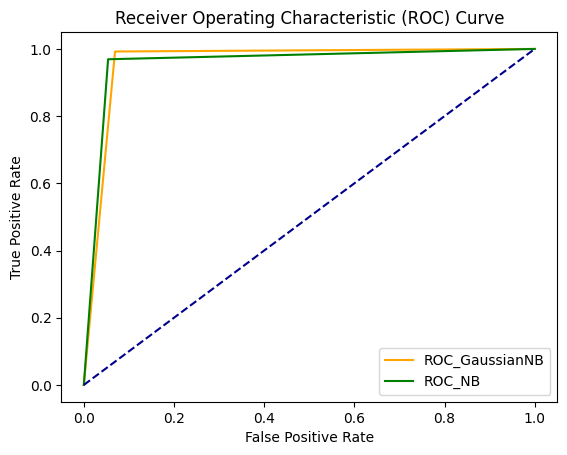

In [22]:
fper_GaussianNB, tper_GaussianNB, thresholds_GaussianNB = metrics.roc_curve(y_test, y_predict_GaussianNB)
fper, tper, thresholds = metrics.roc_curve(y_test, y_predic)

plt.plot(fper_GaussianNB, tper_GaussianNB, color='orange', label='ROC_GaussianNB')
plt.plot(fper, tper, color='green', label='ROC_NB')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


GaussianNB的ACC与F-1Score均相对较高；同时根据roc曲线来看，GaussianNB的表现较好。推测由于对于数据集数据的预处理更好例如0值，离群点等。并且GaussianNB利用RandomSearchCV对于参数进行了优化

### Exercise 3 Questions
1. Describe another real-world application where the naïve Bayes method can be applied
    
    现实生活中朴素贝叶斯算法应用广泛，如本次实验课中运用于文本分类，垃圾邮件的分类，其次还可以运用于信用评估，钓鱼网站检测等等。
2. What are the strengths of the naïve Bayes method; when does it perform well?
    
    朴素贝叶斯模型的训练速度较快，可以应对较大型较复杂的数据集；算法较为稳定，当数据呈现不同的特点时，朴素贝叶斯的分类性能不会有太大的差异。换句话说就是朴素贝叶斯算法的健壮性比较好；因其假设数据集属性之间是相互独立的，数据集属性之间的关系相对比较独立时，朴素贝叶斯分类算法会有较好的效果。
3. What are the weaknesses of the naïve Bayes method; when does it perform poorly?
    
    数据集属性的独立性在很多情况下是很难满足的，因为数据集的属性之间往往都存在着相互关联，会导致分类的效果大大降低。
4. What makes the naïve Bayes method a good candidate for the classification problem, if you have enough knowledge about the data?
    
    1.数据集中，变量类型多，且相对独立
    2.无需精确分类的场景例如垃圾邮件分类
    3.训练数据误差较小